# Effects of temperature on microbial carbon use efficiency

Danica Duan  
Emma Cavan, Tom Clegg, Samraat Pawar

## Introduction

## The Model
Adapted from [Emma Cavan](https://nbviewer.jupyter.org/github/e-cavan/Bacteria_Model/blob/master/Code/Consumer_Resource_Model.ipynb)'s model of the impact of chemical pollution on microbial communities. Originated from [Marsland et al. (2019)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006793) with [Tom Clegg](https://nbviewer.jupyter.org/github/CleggTom/Bacteria_EcoFunc/blob/master/notebooks/Metabolic_model.ipynb) making the first version.  

Further adapted to monitor microbial carbon use efficiency over time with different temperature. 

### Equations
#### General Model
Growth rate (biomass) of species i on resource j: 
\begin{equation}
dC_i/dt = C_i\Bigl(\sum_{j=1}^{M}U_{ij}s_j(1-\sum_{k=1}^{M}l_{jk}) - R_i\Bigl)
\end{equation}

Concentration dynamic of resource j:
\begin{equation}
dS_j/dt = \rho_j - \sum_{i=1}^{N}\Bigl(C_iU_{ij}s_j-\sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}\Bigl)
\end{equation}

Type 2: Monod equation
\begin{equation}
s_j = \frac{S_j}{K_j + S_j}
\end{equation}




| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $M$ | Number of resources | - | User defined |
| $N$ | Number of species | - | User defined |
| $C_i$ | Bacteria population of species i | g/mL | 0.1 |
| $S_j$ | Concentration of resource j | g/mL | 0.1 |
| $K_j$ | Half saturation constant | g/mL | 0.5? (Dependant on temperature, species & resources?) |
| $U_{ij}$ | Uptake of resource j by species i | - | Temperature & size dependant |
| $R_i$ | Respiration of species i | - | Temperature & size dependant |
| $l_{jk}$ | Leakage: proportion of resource j converted to resource k | - | $l_j$ = 0.4|
| $\rho_j$ | Supply of resource j | g/mL | 1 |

###### Description: 
Generally speaking, the growth rate of speices i is calculated by the actual uptake of all resources by that species minus carbon loss through respiration:

\begin{equation}
\frac{1}{C_i}\frac{dC_i}{dt} = U_i - R_i
\end{equation}


The actual uptake by species i is calculated as follow, where $U_{ij}$ is the per biomass uptake rate of resource j by species i; $s_j$ is the Monod equation considering the concentration of resources (resource avalibility):

\begin{equation}
U_i = \sum_{j=1}^{M}U_{ij}s_j
\end{equation}

$l_{jk}$ represents the percentage of resources consumed but was transformed and released into the environment as another resource. 

In the resource model, the resource dynamic of the system is calculated by the external input of each resource which is constant through time as $\rho_j$, minus the uptake of $U_j$ by all species, and plus the internal supply by the conversion of other resources: 

\begin{equation}
\frac{dS_j}{dt} = \rho_j - U_j + L_j
\end{equation}


For each species i, the total uptake rate of resource j (not considering the release of k) is $C_iU_{ij}s_j$. 

The release of converted j from k is calculated by the uptake and leakage of resource k.  

\begin{equation}\label{eq:}
L_{ij} = \sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}
\end{equation}



#### Size and Temperature Dependency
\begin{equation}
U_{ij} = B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

\begin{equation}
R_i = B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $B$ | Normalisation constant | - | Experimental observation |
| $m$ | Mass | g | 1 |
| $Ea$ | Activation energy | eV | Experimental observation |
| $k$ | Boltsmann constant | eV/K | $8.62$ $\times 10^{-5}$ |
| T | Temperature | K | User defined |
| $T_{ref}$| Reference temperature | K | 273.15 |

With modified Schoolfield ([Kontopoulos et al., 2020](https://onlinelibrary.wiley.com/doi/full/10.1111/evo.13946)): 
\begin{equation}
U_{ij} = \frac{B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_U}{E_{D_U}-Ea_U}e^{\frac{E_{D_U}}{k}\cdot(\frac{1}{T_{pk_U}}-\frac{1}{T_{ref}})}}
\end{equation}

\begin{equation}
R_i = \frac{B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_R}{E_{D_R}-Ea_R}e^{\frac{E_{D_R}}{k}\cdot(\frac{1}{T_{pk_R}}-\frac{1}{T_{ref}})}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $E_D$ | High temperature deactivation energy | eV | 3.5|
| $T_{pk_U}$ | Temperature of peak uptake rate | K | 273.15 + 25 |
| $T_{pk_R}$ | Temperature of peak respiration rate | K | $T_{pk_U}$ + 2|

#### Carbon Use Efficiency

Percentage of carbon assimilated, calculated by growth rate over total actual uptake at each time point:

\begin{equation}
CUE_i = \frac{dC_i/dt}{C_i\sum \limits _{j=1}^{M}U_{ij}s_j}
\end{equation}


## Simulation

- Extincted species are detected and replaced (concentration < 0.01 g/mL).
- Steady state is reached when no concentration change within 50 time steps. 
- CUE is calculated at each time step for each consumer. 

### Example uptake and leakage matrix at 21 C (10 consumers, 5 resources)

- Uptake: assuming each consumer has one single temperature response curve which controls the total uptake of all resources. The resources uptake by each consumer are averagely and randomly distributed, which sum up to the total value calculated by the size and temperature dependency function.
- leakage(the conversion of resource j to k): the total conversion effecient of each resource is 0.4, which is averagely distributed among all resources it converted to. Assuming no resources can be converted back, so the lower diagnol is set to be 0. 

In [3]:
import parameters as par
import size_temp_funcs as st
import numpy as np

N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
k = 0.0000862 # Boltzman constant
T_pk = Tref + pk_U # Peak above Tref, Kelvin
T = 273.15 + 21 # Model temperature
Ea_U = np.round(np.random.normal(1.5, 0.01, N),3)[0:N] # Ea for uptake
Ea_R = Ea_U - 0.8 # Ea for respiration, which should always be lower than Ea_U so 'peaks' later
B_U = (10**(2.84 + (-4.96 * Ea_U))) + 4 # B0 for uptake - ** NB The '+4' term is added so B_U>> B_R, otherwise often the both consumers can die and the resources are consumed
B_R = (10**(1.29 + (-1.25 * Ea_R))) # B0 for respiration

U_sum = st.temp_growth(k, T, Tref, T_pk, N, B_U, Ma, Ea_U, Ea_D)
np.random.seed(0)
diri = np.transpose(np.random.dirichlet(np.ones(M),N))
U = np.transpose(diri*U_sum)
print(U_sum)
print(U)

[243.43969511 352.53209565 150.19781987 228.05583449 282.8030899
 189.27292257 355.09576196 320.00413317 366.68293075 352.2699501 ]
[[ 44.91884013  70.88423184  52.10634649  44.42931938  31.10095727]
 [ 47.93059548  26.57104556 102.65751095 153.04560257  22.32734108]
 [ 40.39895397  19.38129997  21.61533072  66.90484303   1.89739218]
 [  3.81802475   0.85546857  74.86392237  63.06556131  85.45285748]
 [141.00993824  58.86649473  22.69705323  55.61360396   4.61599975]
 [ 36.17707751   5.48021635 102.51459187  26.13236868  18.96866816]
 [ 33.43032963 161.91354028  66.26465292  91.42356797   2.06367116]
 [ 44.64472223  43.97674465  44.55960318 133.6449636   53.17809951]
 [ 48.37281792  62.38069138 129.86914309   6.74425854 119.31601982]
 [168.93243869  35.92928776  20.99547695  57.64372147  68.76902523]]


In [4]:
import numpy as np

M = 5
np.random.seed(0)
l_raw = np.array([[np.random.normal(1/(i-1),0.005)* 0.4 if i-1>0 else np.random.normal(0.4, 0.005) for i in range(M,0,-1)] for i in range(1,M+1)])
fix = [[1 if j>i else 0 for j in range(M)] for i in range(M)]
fix[M-1][0] = 1
l = np.transpose(l_raw) * fix
print(l)
np.sum(l, axis = 1)

[[0.         0.09804544 0.10028809 0.10066735 0.09489402]
 [0.         0.         0.13624188 0.13632149 0.13464057]
 [0.         0.         0.         0.19958968 0.20172887]
 [0.         0.         0.         0.         0.39851567]
 [0.40933779 0.         0.         0.         0.        ]]


array([0.3938949 , 0.40720394, 0.40131856, 0.39851567, 0.40933779])

### Type I


#### 1 consumer, 1 resource

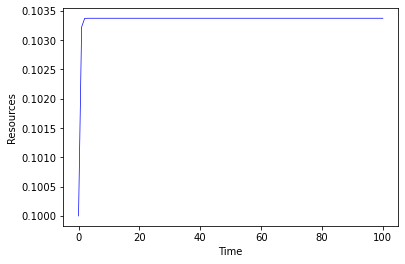

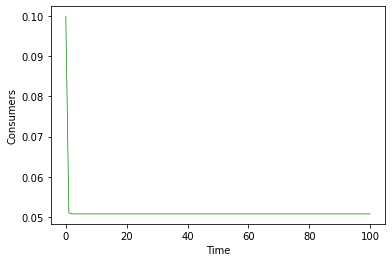

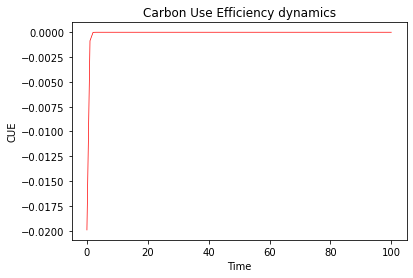

In [6]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant for Monod equation(Type II)


########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K)

#### With only 20 C and 1 assembly (2 consumers, 1 resources)

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:150: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U))


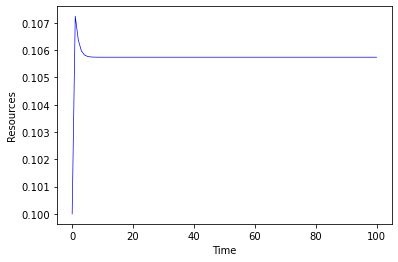

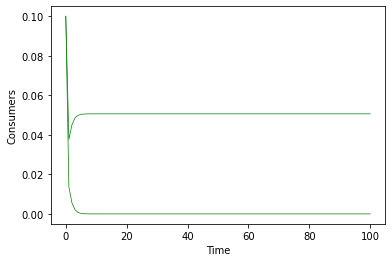

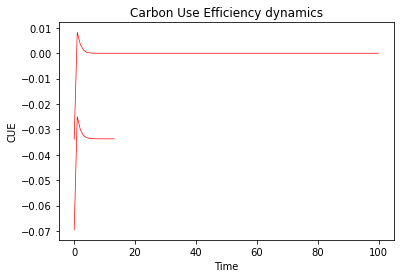

In [8]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)


########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K)

#### With 20&21 C, 2 assembly (2 consumers, 1 resources)

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:150: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U))


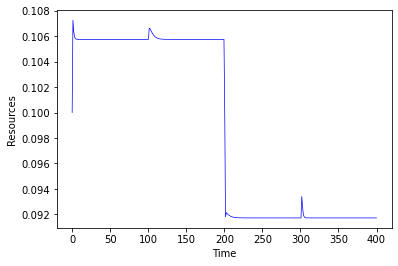

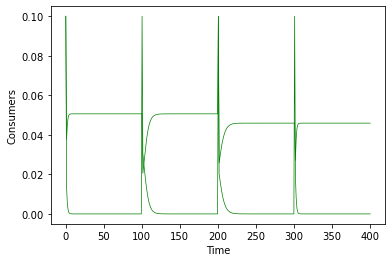

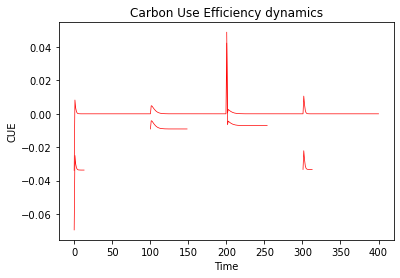

In [10]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 22 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K)

#### With only 20 C and 1 assembly (20 consumers, 5 resources)

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:150: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U))


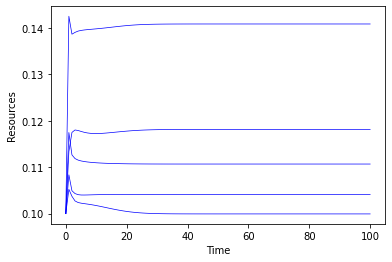

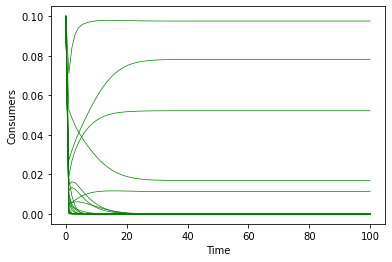

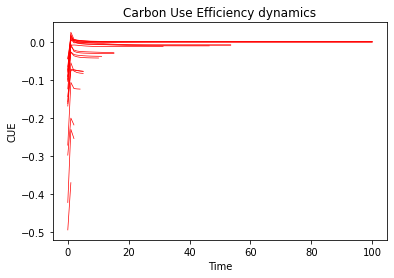

In [12]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 20 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K)

#### With 20&21 C, 2 assembly (20 consumers, 5 resources)

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:150: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U))


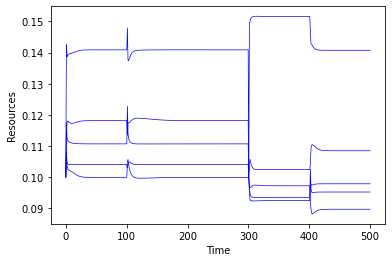

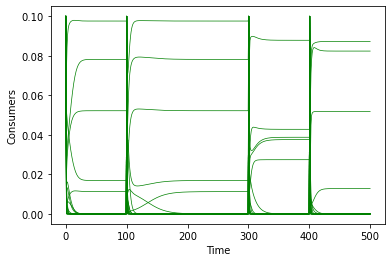

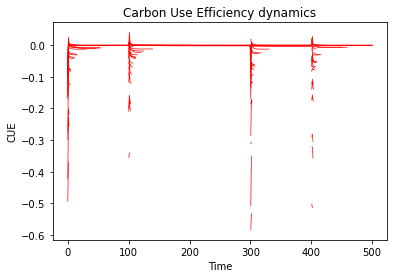

In [14]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 20 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 22 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 10 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K)

####  20-30 C, 1 assembly (20 consumers, 5 resources)

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:150: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U))


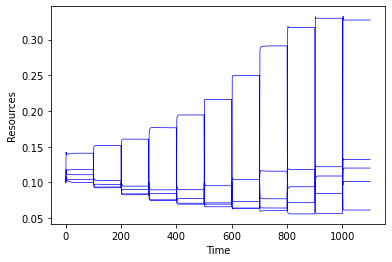

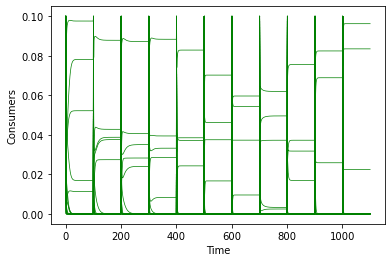

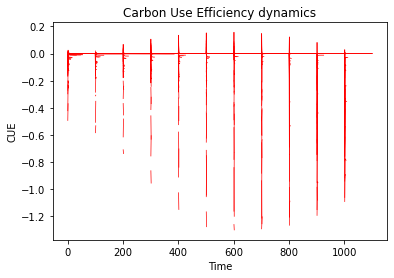

In [15]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 20 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U = np.random.normal(25, 3, size = N)
pk_R = pk_U + 2
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 31# Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 10 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk_R, pk_U, Ea_D, typ, K)

### Type II

/home/danica/Documents/CMEEProject/code/Bacteria_vector_modular.py:146: RuntimeWarning: invalid value encountered in true_divide
  CUE = dCdt / (xc*np.einsum('ij,kj->ik', xr, U))


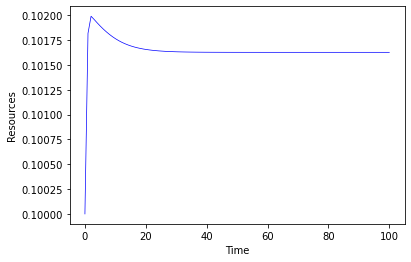

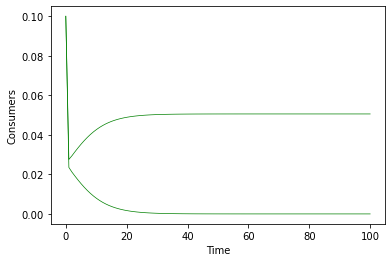

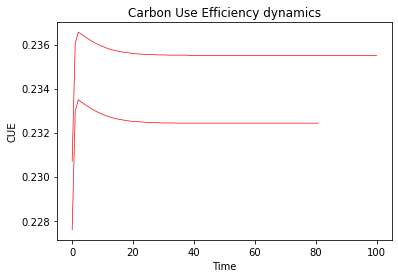

In [11]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ, K)